# INFO371 Homework: Neural Networks and Support Vector Machines

Your task for this assignment is to explore a dataset using both neural networks and SVMs in order to give you some experience with hyperparameter tuning and visualizing decision boundaries. You'll want to make sure you are familiar with the documentation for both methods before starting the assignment. 

## Data
In this assignment, you will work with a dataset to try to predicit whether someone is at high or low risk of having a heart attack given some general health information about each person. The dataset has the following features: 

* Age : Age of the patient
* Sex : Sex of the patient (0 = Male, 1 = Female)
* exang: exercise induced angina (1 = yes; 0 = no)
* caa: number of major vessels (0-3)
* cp : Chest Pain type
     * Value 0: typical angina
     * Value 1: atypical angina
     * Value 2: non-anginal pain
     * Value 3: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* old peak: ST depression induced by exercise relative to rest
* slp: the slope of the peak exercise ST segment
    * 0 = unsloping
    * 1 = flat
    * 2 = downsloping
* thall : thalassemia
    * 0 = null
    * 1 = fixed defect
    * 2 = normal
    * 3 = reversable defect
* output : 0= less chance of heart attack 1= more chance of heart attack

Note that the column "output" is your label (i.e. the thing you are trying to predict). 

---
For some more information on some of the health definitions: 
* [Angina](https://www.nhs.uk/conditions/angina/#:~:text=Angina%20is%20chest%20pain%20caused,of%20these%20more%20serious%20problems): chest pain due to reduced blood flow to the heart muscles. There're 3 types of angina: stable angina, unstable angina, and variant angina.

* ECG: short for electrocardiogram, it's a routine test usually done to check the heart's electrical activity.

* [ST depression](https://litfl.com/st-segment-ecg-library/): a type of ST-segment abnormality. the ST segment is the flat, isoelectric part of the ECG and it represents the interval between ventricular depolarization and repolarization.

* Thalassemia: is a genetic blood disorder that is characterized by a lower rate of hemoglobin than normal.

## Dataset Exploration and Experiment Set-Up

1. load the dataset and ensure it looks good 


2. Plot your data using PCA to reduce the dimensions to a 2D space. Make sure to color each point in the dataset occording to each label/output.  


   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


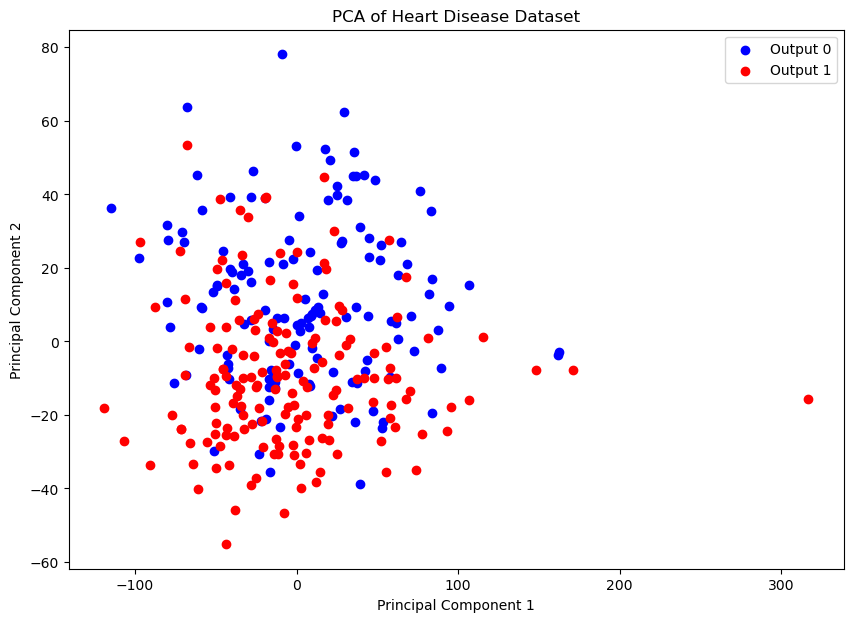

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.decomposition import PCA

df = pd.read_csv('heart.csv.bz2')
print(df.head())


X = df.drop(columns='output')
y = df['output']

pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, y.reset_index(drop=True)], axis=1)


plt.figure(figsize=(10, 7))
colors = ['b', 'r']
labels = [0, 1]
for color, label in zip(colors, labels):
    subset = pca_df[pca_df['output'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=f'Output {label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Heart Disease Dataset')
plt.legend()
plt.show()


## Running Neural Networks

3. Using the default parameters, train a Neural Networl model and examine the examine average performance across different random splits. Run the model at least 10 times on different random splits of your data and report the average testing and training accuracy as well as the standard deviation. For an idea on how to do this, take a look at some of the lecture code we’ve done in class. Please don't use the cross-validation function here -- we want you to write this part yourself. 

    Hint – its probably a good idea to write a function to do this since you will be using this code to tune the various parameters. 
    
    Hint - you are welcome to use any code from previous homework assignments. 


7. Now lets examine what happens as you increase the complexity of the model. Tune the model by examining various numers of layers (and number of nodes at each layer) to try to get the best possible accuracy. The hidden_layer_sizes parameter accepts a set where the length is the number of hidden layers and each element is the number of nodes in each layer. For example if I set as hidden_layer_sizes=(5, 2, 3) then my neural network will have 3 hidden layers where the first layer has 5 nodes, the second 2 nodes, and the third has 3 nodes. max-tree-depth. 

8. Plot the __average__ training and testing accuracy as you increase the number of total nodes in your model. (NOTE - this means you'll have to run your model multiple times to get average accuracy. Use your function from step 3 to get this score). Accuracy should be on the y-axis and number of nodes should be on the x-axis. 



8. Now plot the __average__ training and testing accuracy as you increase the number of layers in your model. (NOTE - this means you'll have to run your model multiple times to get average accuracy. Use your function from step 3 to get this score). Accuracy should be on the y-axis and number of layers should be on the x-axis. 



9. Using these figures, explain when your model is overfitting and underfitting. 


10. EXTRA CREDIT (5pts) -- Experiment with regularization (through different alpha terms) to combat overfitting. Use average test/train accuracy scores to find the best alpha values. Be sure to compare overall performance (both with repect to over/underfitting and the impact on model accuracy) with your non-regularized model from above.  


In [3]:
#code goes here
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
test_acc = []
train_acc = []
for i in range(1,11):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    model = MLPClassifier(max_iter=500)
    model.fit(x_train, y_train)
    train_acc.append(model.score(x_train, y_train))
    test_acc.append(model.score(x_test, y_test))

print("Average training accuracy:", np.mean(train_acc))
print("Average testing accuracy:",np.mean(test_acc))
print("Average training STD:",np.std(train_acc))
print("Average testing STD:",(np.std(test_acc)))

Average training accuracy: 0.8388429752066117
Average testing accuracy: 0.798360655737705
Average training STD: 0.019381883305055494
Average testing STD: 0.038828587810908234


In [21]:
test_accuracy = []
train_accuracy = []
for n in range(1,11):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    for i in range(2,21):
        for j in range(2,21):
                model = MLPClassifier(hidden_layer_sizes=(i,j), max_iter=2000)
                model.fit(x_train, y_train)
                test = ((model.score(x_test, y_test)), (i,j))
                train = ((model.score(x_train, y_train)), (i,j))
                test_accuracy.append(test)
                train_accuracy.append(train)

In [23]:
def isolate_runs_by_node_count(results):
    runs_by_node_count = {}
    for accuracy, nodes in results:
        if nodes not in runs_by_node_count:
            runs_by_node_count[nodes] = []
        runs_by_node_count[nodes].append(accuracy)
    mean_accuracies = {nodes: np.mean(accuracies) for nodes, accuracies in runs_by_node_count.items()}
    return mean_accuracies

# Isolate test and train runs by node count
test_runs_by_node_count = isolate_runs_by_node_count(test_accuracy)
train_runs_by_node_count = isolate_runs_by_node_count(train_accuracy)

graphing_train = []
graphing_test = []
for layer1, layer2 in test_runs_by_node_count.keys():
    graphing_train.append((layer1+layer2, train_runs_by_node_count[(layer1, layer2)]))
    graphing_test.append((layer1+layer2, test_runs_by_node_count[(layer1, layer2)]))
    
value_dict = {}
for key, value in graphing_train:
    if key not in value_dict:
        value_dict[key] = []
    value_dict[key].append(value)

mean_values = {}
for key, values in value_dict.items():
    if len(values) > 1:
        mean_values[key] = np.mean(values)
    else:
        mean_values[key] = values[0]

graphing_train = mean_values

value_dict = {}
for key, value in graphing_test:
    if key not in value_dict:
        value_dict[key] = []
    value_dict[key].append(value)

mean_values = {}
for key, values in value_dict.items():
    if len(values) > 1:
        mean_values[key] = np.mean(values)
    else:
        mean_values[key] = values[0]

graphing_test = mean_values

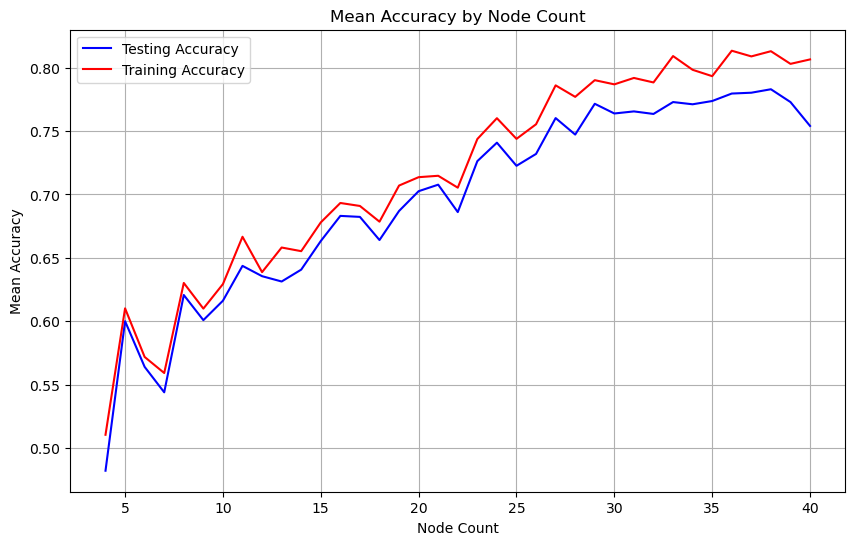

In [28]:
import matplotlib.pyplot as plt
x1 = list(graphing_test.keys())
y1 = list(graphing_test.values())

x2 = list(graphing_train.keys())
y2 = list(graphing_train.values())

plt.figure(figsize=(10, 6))
plt.plot(x1, y1, linestyle='-', color='b', label='Testing Accuracy')
plt.plot(x2, y2, linestyle='-', color='r', label='Training Accuracy')
plt.title('Mean Accuracy by Node Count')
plt.xlabel('Node Count')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
def test_mlp_accuracy(num_layers_list, num_nodes_per_layer, X, y, test_size=0.20, num_runs=10, max_iter=1000):
    test_accuracy = []
    train_accuracy = []
    
    for num_layers in num_layers_list:
        hidden_layer_sizes = tuple([num_nodes_per_layer] * num_layers)
        for n in range(num_runs):
            x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=n)
            model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter)
            model.fit(x_train, y_train)
            test = (model.score(x_test, y_test), hidden_layer_sizes)
            train = (model.score(x_train, y_train), hidden_layer_sizes)
            test_accuracy.append(test)
            train_accuracy.append(train)
    
    return train_accuracy, test_accuracy

number_of_layers = [1,2,3,4,5,6]
num_nodes_per_layer = 4

train_accuracy, test_accuracy = test_mlp_accuracy(number_of_layers, num_nodes_per_layer, X, y, max_iter=2000)

In [34]:
def mean_accuracy_by_layer_config(results):
    runs_by_layer_config = {}
    for accuracy, layers in results:
        if layers not in runs_by_layer_config:
            runs_by_layer_config[layers] = []
        runs_by_layer_config[layers].append(accuracy)
    
    mean_accuracies = {layers: np.mean(accuracies) for layers, accuracies in runs_by_layer_config.items()}
    return mean_accuracies

mean_train_accuracy = mean_accuracy_by_layer_config(train_accuracy)
mean_test_accuracy = mean_accuracy_by_layer_config(test_accuracy)

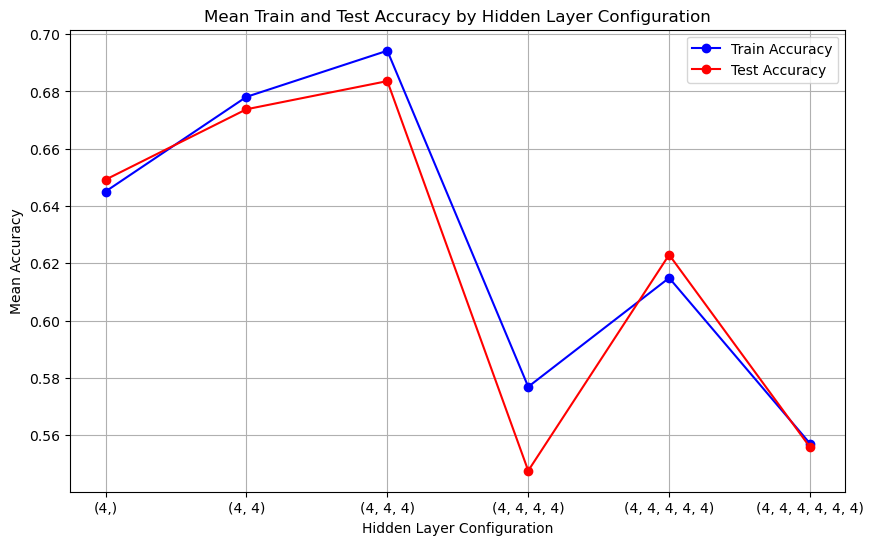

In [36]:
def plot_accuracy_layer(train_accuracies, test_accuracies, title):
    x = [str(layers) for layers in train_accuracies.keys()]
    y_train = list(train_accuracies.values())
    y_test = list(test_accuracies.values())
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_train, marker='o', linestyle='-', color='b', label='Train Accuracy')
    plt.plot(x, y_test, marker='o', linestyle='-', color='r', label='Test Accuracy')
    plt.title(title)
    plt.xlabel('Hidden Layer Configuration')
    plt.ylabel('Mean Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_accuracy_layer(mean_train_accuracy, mean_test_accuracy, 'Mean Train and Test Accuracy by Hidden Layer Configuration')

The results of the analysis above indicate that in a two layer configuration the number of nodes strictly increased the accuracy of both the testing and training scores. When it comes to number of layers though, there is a distinct over fitting once a 4th layer is introduced. This can be seen as the accuracy of both test and train crash significantly as we add the 4th layer above.

In [43]:
#extra credit using a standard param
test_accuracy = []
train_accuracy = []
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1]


for n in range(1,11):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    for alpha in alphas:
        model = MLPClassifier(max_iter=2000, alpha= alpha)
        model.fit(x_train, y_train)
        test = ((model.score(x_test, y_test)), alpha)
        train = ((model.score(x_train, y_train)), alpha)
        test_accuracy.append(test)
        train_accuracy.append(train)



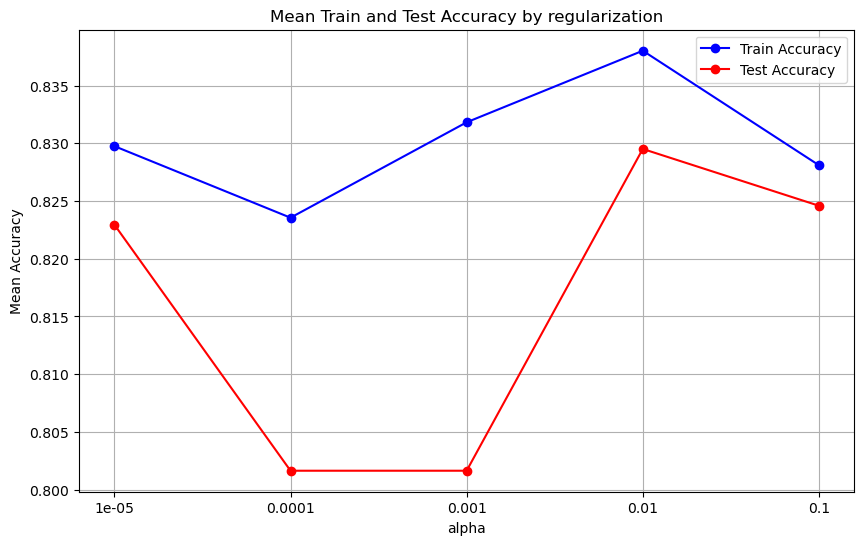

In [51]:
mean_train_accuracy = mean_accuracy_by_layer_config(train_accuracy)
mean_test_accuracy = mean_accuracy_by_layer_config(test_accuracy)

def plot_accuracy_alpha(train_accuracies, test_accuracies, title):
    x = [str(layers) for layers in train_accuracies.keys()]
    y_train = list(train_accuracies.values())
    y_test = list(test_accuracies.values())
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_train, marker='o', linestyle='-', color='b', label='Train Accuracy')
    plt.plot(x, y_test, marker='o', linestyle='-', color='r', label='Test Accuracy')
    plt.title(title)
    plt.xlabel('alpha')
    plt.ylabel('Mean Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_accuracy_alpha(mean_train_accuracy, mean_test_accuracy, 'Mean Train and Test Accuracy by regularization')

Generally regularization does not have a clear direction and is most likely an area of domain knowledge with 0.01 or 0.00001 being the best results based on the analysis. Another note from this graph is that the standard non-parametrized model seems to perform around 4% better than either the layer expanded or node expanded models, though a combined best performer is not analyzed in this notebook.

## Running SVMs

Now lets experiment with SVMs.  

12. __BEFORE RUNNING ANY CODE__, predict which kernel function (linear, rbf, sigmoid, or polynomial) you think will perform the best. Use your figure from step 2 to help you decide. 


13. For each kernel method, train an SVM model and report the average training and test accuracy. Was your prediction correct? Which method peformed the best? 


14. Now plot the decision boundaries for each kernel method and identify the support vectors on your plot. You should have four plots in total for this question. [This tutorial](https://towardsdatascience.com/visualizing-support-vector-machine-decision-boundary-69e7591dacea) has code that will help you do this. What do these figures tell you about the different kernel methods? Which do you think fit the data the best? Does this match your answer in question 13? 


15. Compare your SVM performance with your Neural Netowrk performance. Which perfomed better? Which was more prone to overfitting? What does this tell you about when to use each model? 

Based on the PCA I believe RBF to be the best kernel given that it has no linear or polynomial seperations and sigmoid returns a neural network style SVM which would perform as poorly as the above model.

In [53]:
from sklearn import svm

test_accuracy = []
train_accuracy = []
for n in range(1,11):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    for model_name in ['linear', 'poly', 'rbf', 'sigmoid']:
        model = svm.SVC(kernel=model_name)
        model.fit(x_train, y_train)
        test = ((model.score(x_test, y_test)), model_name)
        train = ((model.score(x_train, y_train)), model_name)
        test_accuracy.append(test)
        train_accuracy.append(train)

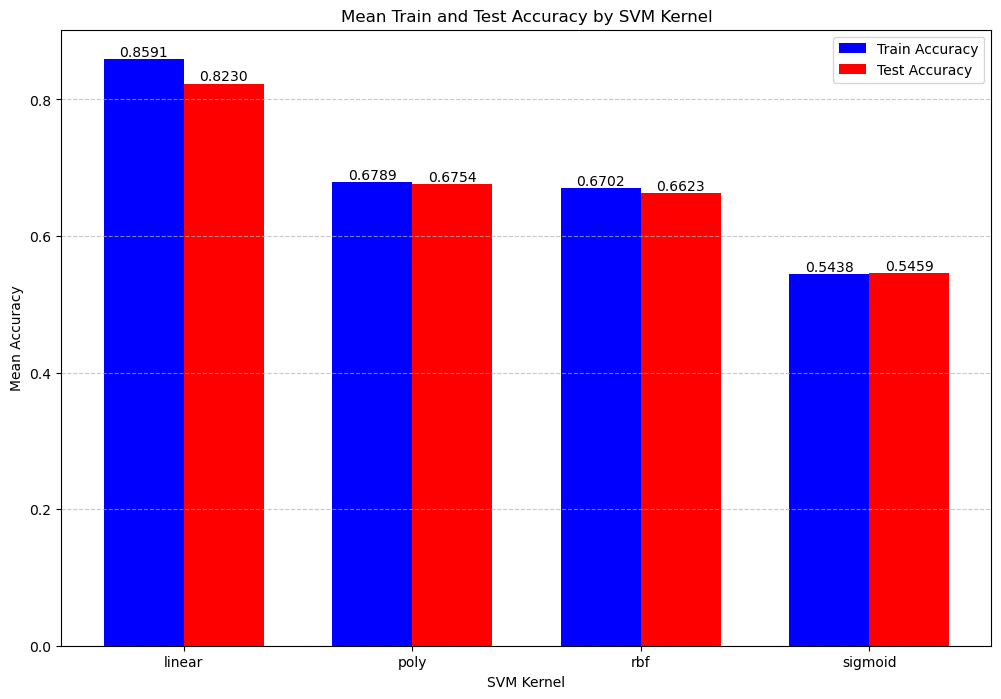

In [62]:
mean_train_accuracy = mean_accuracy_by_layer_config(train_accuracy)
mean_test_accuracy = mean_accuracy_by_layer_config(test_accuracy)

def plot_accuracy_layer(train_accuracies, test_accuracies, title):
    # Extracting the keys and values from the accuracy dictionaries
    x = [str(layers) for layers in train_accuracies.keys()]
    y_train = list(train_accuracies.values())
    y_test = list(test_accuracies.values())
    
    bar_width = 0.35
    index = np.arange(len(x))
    
    plt.figure(figsize=(12, 8))
    
    bar1 = plt.bar(index, y_train, bar_width, label='Train Accuracy', color='b')
    bar2 = plt.bar(index + bar_width, y_test, bar_width, label='Test Accuracy', color='r')
    
    plt.xlabel('SVM Kernel')
    plt.ylabel('Mean Accuracy')
    plt.title(title)
    plt.xticks(index + bar_width / 2, x)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

    add_labels(bar1)
    add_labels(bar2)
    plt.show()

plot_accuracy_layer(mean_train_accuracy, mean_test_accuracy, 'Mean Train and Test Accuracy by SVM Kernel')

My prediction was not correct and in fact the linear kernel produced the strongest accuracy.

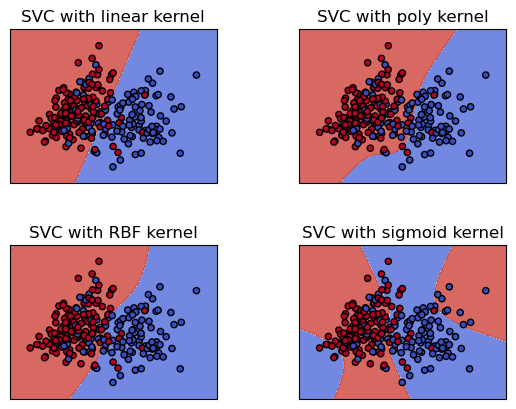

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
scaler1 = StandardScaler()
scaler1.fit(x_train)
feature_scaled = scaler1.transform(x_train)

pca1 = PCA(n_components=2)
pca1.fit(feature_scaled)
feature_scaled = pca1.transform(feature_scaled)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

models = (svm.SVC(kernel='linear'),
          svm.SVC(kernel='poly'),
          svm.SVC(kernel='rbf'),
          svm.SVC(kernel='sigmoid'))
models = (clf.fit(feature_scaled, y_train) for clf in models)


titles = ('SVC with linear kernel',
          'SVC with poly kernel',
          'SVC with RBF kernel',
          'SVC with sigmoid kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = feature_scaled[:, 0], feature_scaled[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

The results of the analysis above indicate the findings we found analytically as the classifications seem to separate properly on its boundary using the Linear kernel. The other boundaries try to incorporate the outliers on the far right which makes the generalized accuracy significantly lower. This is a classic case of overfitting where the elements on the right side drastically pull the boundary over its best position. It seems clear from the linear results that it performs better than our neural networks and are much less prone to the overfitting (in linear kernel) than the neural network. This most likely comes from the fact that this dataset contains strange outliers which complex models will try harder and harder to learn (overfit). 




